# Задания

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math

In [20]:
import scipy.stats as stats

In [21]:
df = pd.read_csv('pizza.csv', sep=';')

In [22]:
df.head()

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19
3,4,2,ital_supr_l,2015-01-01 00:00:00,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58
4,5,2,mexicana_m,2015-01-01 00:00:00,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24


## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [23]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

In [24]:
df['day_of_week'] = df['order_date'].dt.dayofweek + 1

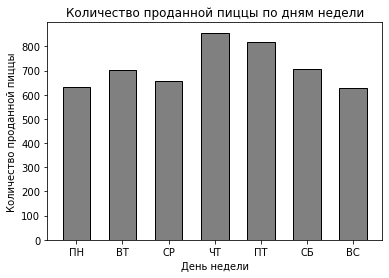

In [25]:
plt.hist(df['day_of_week'], bins=[1,2,3,4,5,6,7,8], align='left', rwidth=0.6, color = "grey", ec="black")
plt.xticks(range(1,8), ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС'])
plt.xlabel('День недели')
plt.ylabel('Количество проданной пиццы')
plt.title('Количество проданной пиццы по дням недели')
plt.show()

In [26]:
df.insert(1, "number_of_pizzas", 1)

In [27]:
df = df.replace({'day_of_week':{1:"понедельник", 2:"вторник", 3:"среда", 4:"четверг", 5:"пятница", 6:"суббота", 7:"воскресенье"}})

In [28]:
day_of_week_sales = df.groupby('day_of_week')['number_of_pizzas'].sum()
most_sales_weekday = day_of_week_sales.idxmax()
least_sales_weekday = day_of_week_sales.idxmin()
print(f"максимально пиццы продано в {most_sales_weekday} ({day_of_week_sales[most_sales_weekday]})")
print(f"минимально пиццы продано в {least_sales_weekday} ({day_of_week_sales[least_sales_weekday]})")

максимально пиццы продано в четверг (857)
минимально пиццы продано в воскресенье (628)


# Задание 2¶
Посчитай, сколько секунд необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - cook_time. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [29]:
df[['data', 'time']] = df.lead_time.str.split(expand=True)

In [30]:
df['time']/ np.timedelta64(1, 's')
df['order_time']/ np.timedelta64(1, 's')

0       41916.0
1       43060.0
2       43060.0
3       43060.0
4       43060.0
         ...   
4995    61897.0
4996    61897.0
4997    61897.0
4998    62647.0
4999    63036.0
Name: order_time, Length: 5000, dtype: float64

In [31]:
df['cook_time'] =(df['time']/ np.timedelta64(1, 's')) - (df['order_time']/ np.timedelta64(1, 's'))

In [32]:
df[['cook_time']].describe().round(0)

,cook_time
count,5000.0
mean,1007.0
std,181.0
min,444.0
25%,888.0
50%,1006.0
75%,1127.0
max,1609.0


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [33]:
mean_cook_time = df['cook_time'].mean()
cook_time_std = df['cook_time'].std(ddof=1)/5000**0.5
ci = stats.t.interval(0.95, df=4999, loc=mean_cook_time, scale=cook_time_std)
ci_rounded = ((ci[0].round(0)), int(ci[1].round(0)))
print(ci_rounded)

(1002.0, 1012)


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [ ]:
df['pizza_name'].value_counts().loc[lambda x : x > 100]

In [35]:
df_a = df.groupby("pizza_name").filter(lambda x: len(x) > 100)

In [36]:
stats = df_a.groupby(['pizza_name'])['cook_time'].agg(['mean', 'count', 'std'])

In [37]:
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

In [38]:
stats['ci95_hi'].max()

1068.4265622304822

In [39]:
rslt = stats.loc[stats['ci95_hi'] == 1068.4265622304822]
rslt

,mean,count,std,ci95_hi,ci95_lo
pizza_name,,,,,
The Italian Vegetables Pizza,1037.410256,117,171.169716,1068.426562,1006.393951


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [ ]:
stats['INT_ci'] = stats['ci95_hi'] -stats['ci95_lo']
stats['INT_ci']

In [41]:
stats['INT_ci'].max()

72.45233428890594

In [42]:
rslt_1 = stats.loc[stats['INT_ci'] == 72.45233428890594]
rslt_1

,mean,count,std,ci95_hi,ci95_lo,INT_ci
pizza_name,,,,,,
The Chicken Alfredo Pizza,1012.128713,101,185.749221,1048.35488,975.902546,72.452334


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [43]:
df_1 = pd.read_csv('click.csv')

In [44]:
df_1.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [46]:
import statsmodels.stats.proportion as proportion


clicks_a = df_1['banner_a'].sum()
total_a = len(df_1)


clicks_b = df_1['banner_b'].sum()
total_b = len(df_1)


ci_a = proportion.proportion_confint(clicks_a, total_a, alpha=0.05)


ci_b = proportion.proportion_confint(clicks_b, total_b, alpha=0.05)


intervals_intersect = ci_a[1] >= ci_b[0] and ci_b[1] >= ci_a[0]

print("95% доверительный интервал для баннера 'banner_a':", ci_a)
print("95% доверительный интервал для баннера 'banner_b':", ci_b)
print("Интервалы пересекаются:", intervals_intersect)


95% доверительный интервал для баннера 'banner_a': (0.02530064022092865, 0.04869935977907135)
95% доверительный интервал для баннера 'banner_b': (0.03911451622486782, 0.06688548377513218)
Интервалы пересекаются: True


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [47]:
import numpy as np
from scipy.stats import norm

clicks_a = df_1['banner_a'].sum()
total_a = len(df_1)

clicks_b = df_1['banner_b'].sum()
total_b = len(df_1)


p_a = clicks_a / total_a
p_b = clicks_b / total_b


se = np.sqrt(p_a * (1 - p_a) / total_a + p_b * (1 - p_b) / total_b)


z_value = norm.ppf(1 - 0.95 / 2)

ci_low = p_a - p_b - z_value * se
ci_high = -(p_a - p_b - z_value * se)


confidence_interval = [ci_low.round(5), (ci_high.round(5))]
print("95% доверительный интервал для разности двух долей:", confidence_interval)


95% доверительный интервал для разности двух долей: [-0.01658, 0.01658]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [48]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [49]:
clicks_a = df_1['banner_a'].values
clicks_b = df_1['banner_b'].values


z_statistic = z_stat(clicks_a, clicks_b)


alpha = 0.95


if z_statistic > 0:
    p_value = 1 - norm.cdf(z_statistic)
else:
    p_value = norm.cdf(z_statistic)


if p_value < alpha:
    print("Отклоняем нулевую гипотезу")
    print("Новый баннер лучше старого баннера.")
else:
    print("Не отклоняем нулевую гипотезу")
    print("Старый баннер так же хорош или лучше нового баннера.")


print("Z-статистика:", z_statistic.round(2))
print("P-значение:", p_value.round(2))

Отклоняем нулевую гипотезу
Новый баннер лучше старого баннера.
Z-статистика: -1.73
P-значение: 0.04


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [ ]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

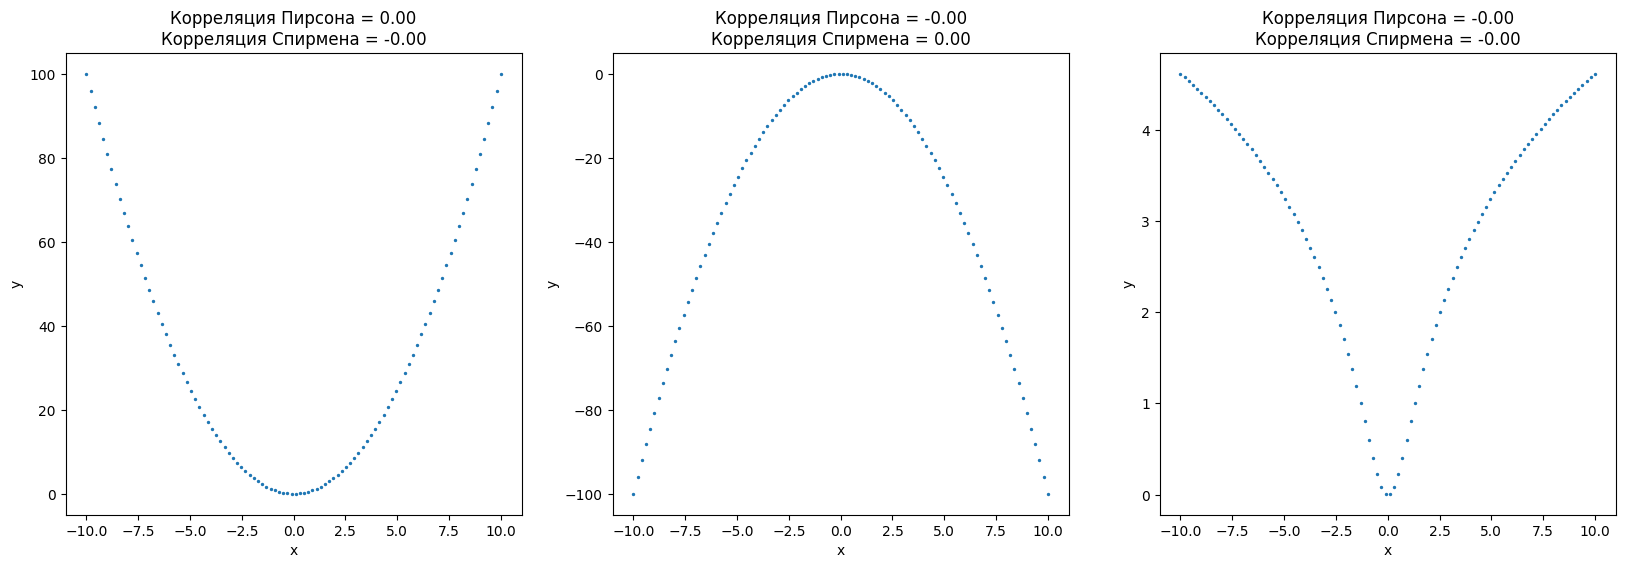

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

x = np.linspace(-10, 10, 100)

y = [x**2, -x**2, np.log(x**2 + 1)]

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i in [0, 1, 2]:
  ax[i].scatter(x, y[i], s=2)
  ax[i].title.set_text('Корреляция Пирсона = ' + format(np.corrcoef(x, y[i])[0,1],'.2f') + '\n' +
                       'Корреляция Спирмена = ' + format(stats.spearmanr(x, y[i]).statistic,'.2f'))
  ax[i].set(xlabel='x', ylabel = 'y')

plt.show()

Для первого графика, y[0] = x^2, корреляция Пирсона и Спирмена будет равна 0, так как нет линейной или монотонной связи между x и y[0]. Второй график, y[1] = -x^2, также не имеет линейной или монотонной связи с x, поэтому корреляции Пирсона и Спирмена равны 0. Наконец, для третьего графика также нет линейной или монотонной связи с x, поэтому корреляции Пирсона и Спирмена также равны 0.

В результате, значения корреляций Пирсона и Спирмена в данном коде демонстрируют отсутствие линейной или монотонной связи между x и соответствующими массивами y.

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

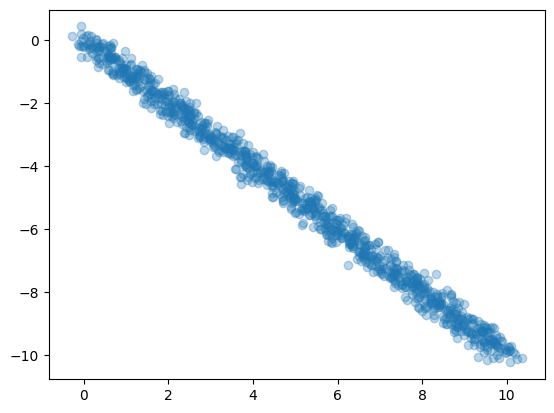

In [ ]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

plt.scatter(x, y, alpha=0.3)
plt.show()

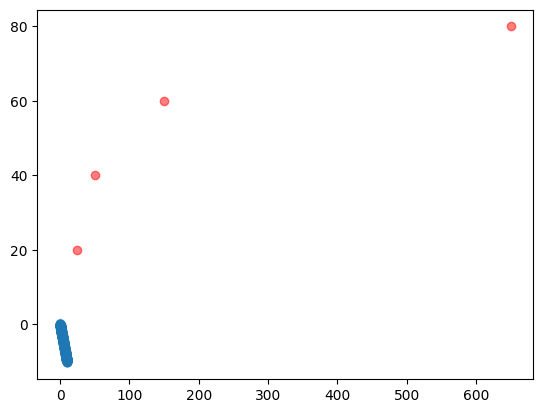

In [ ]:
# Выбросы
outliers_x = np.array([25, 50, 150, 650])
outliers_y = np.array([20, 40, 60, 80])

plt.scatter(x, y, alpha = 0.3)
for i in range(len(outliers_x)):
  plt.scatter(outliers_x[i], outliers_y[i], color='red', alpha = 0.5)
plt.show()

In [ ]:
ind = [np.random.randint(0, 1000), np.random.randint(0, 1000), np.random.randint(0, 1000)]
plus = [0, 25, 25, 100, 500, 0]
l = [0, 25, 50, 150, 650]

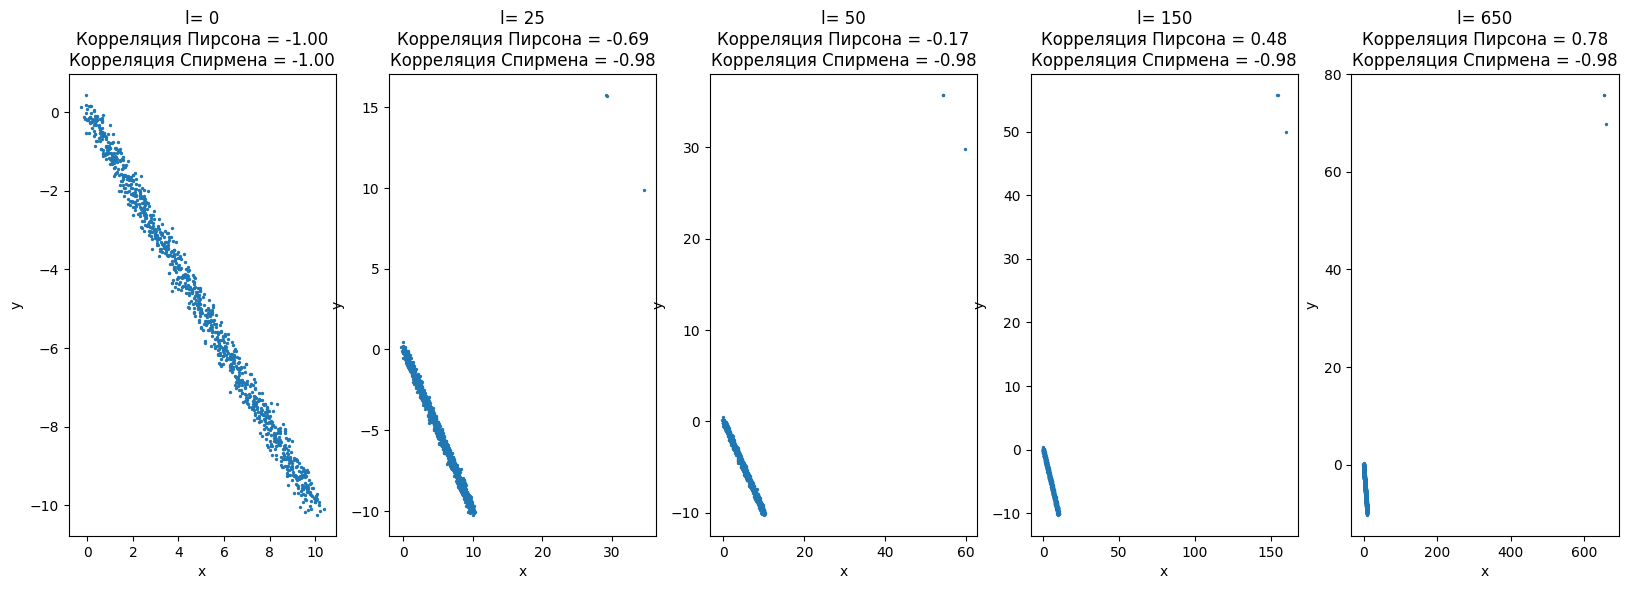

In [ ]:
fig, ax =plt.subplots(nrows = 1, ncols = 5, figsize = (20, 6))
for i in [0, 1, 2, 3, 4]:
  ax[i].scatter(x, y, s=2)
  ax[i].title.set_text("l= " + str(l[i]) + '\n' +
                       'Корреляция Пирсона = ' + "{:.2f}".format(np.corrcoef(x, y)[0,1]) + '\n' +
                       'Корреляция Спирмена = ' + "{:.2f}".format(stats.spearmanr(x, y).statistic))
  x[ind] += plus[i +1]
  ax[i].set(xlabel = 'x', ylabel = 'y')
  y[ind] +=20

plt.show()           